In [62]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [63]:
with open('../Solvers/file1.json', 'r') as file:
    # Load the JSON data into a Python dictionary
    data = json.load(file)

print(len(data['1']))

1998


In [64]:
def remove_nans(data):
    spectrograms = data
    spectrograms[np.isinf(spectrograms)] = np.nan

    for i in range(spectrograms.shape[0]):
        sample = spectrograms[i, :, :]

        mean_valid = np.nanmean(sample)
        sample[np.isnan(sample)] = mean_valid
       
        spectrograms[i, :, :] = sample
    

    return spectrograms

In [65]:
cleaned1 = remove_nans(np.array(data['1']).reshape((1, 1998, 101)))

cleaned2 = remove_nans(np.array(data['2']).reshape((1, 1998, 101)))

cleaned3 = remove_nans(np.array(data['3']).reshape((1, 1998, 101)))

print(np.max(cleaned1))

print("ID" if cleaned1.all() == cleaned2.all() else "NOID")

4.73046875
NOID


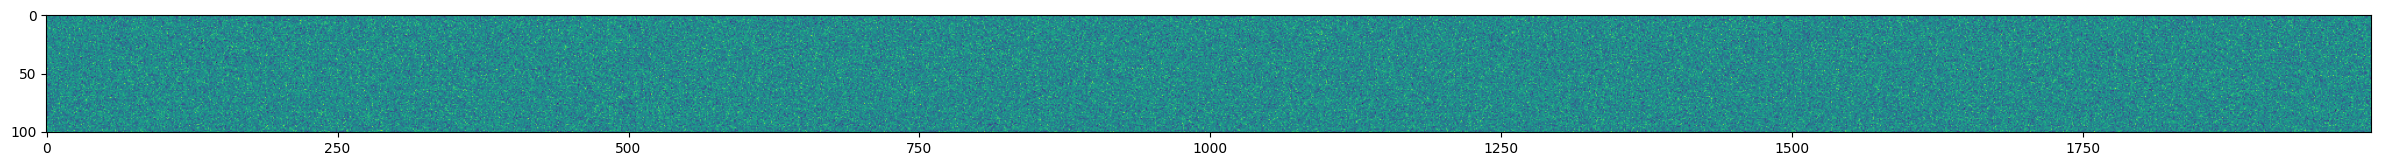

In [66]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(cleaned1))
plt.show()

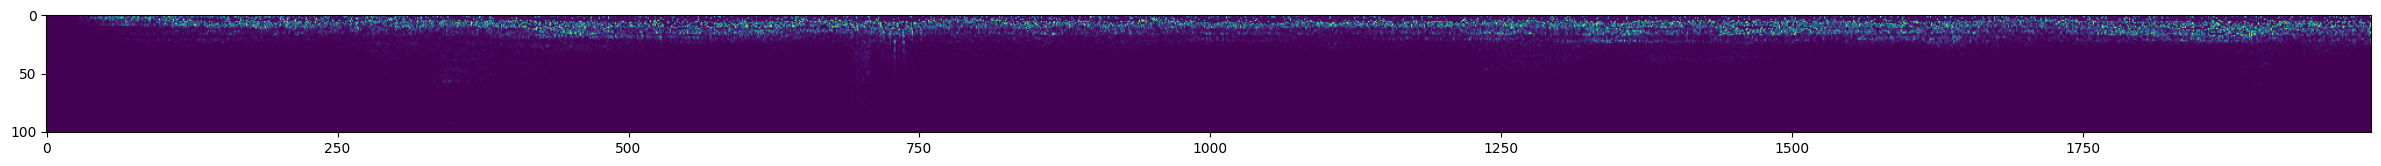

In [67]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(cleaned2))
plt.show()

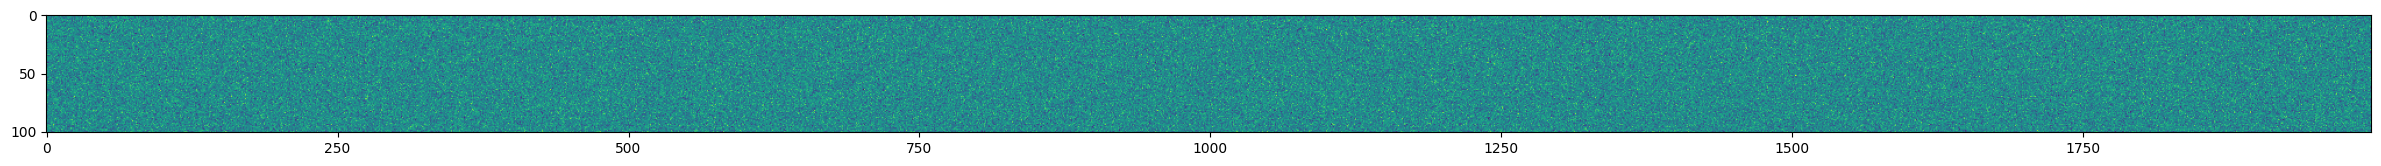

In [68]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(cleaned3))
plt.show()

In [69]:
model_path = '../Eagle/saved_eagle'

model = tf.saved_model.load(model_path)

infer = model.signatures["serving_default"]

In [70]:
def get_model_prediction2(data):
    input_data = tf.constant(data.reshape((1, 1998, 101, 1)), dtype=tf.float32)
    result = infer(input_data)

    # Print the keys in the result dictionary
    print("Keys in result dictionary:", result.keys())

    # Assuming 'dense_1' is not present in the keys, you can adjust accordingly
    result_value = result['dense_1'].numpy()
    return result_value[0][0]

In [71]:
lst = [] 
lst.append(get_model_prediction2(cleaned1))
lst.append(get_model_prediction2(cleaned2))
lst.append(get_model_prediction2(cleaned3))
best_prediction = max(lst)
if(best_prediction <= 0.5):
    print("DISCARD THIS ONE")
for i in range(3):
    if(lst[i] == best_prediction):
        print("THIS IS BEST OPTION" + str(i+1))

Keys in result dictionary: dict_keys(['dense_1'])
Keys in result dictionary: dict_keys(['dense_1'])
Keys in result dictionary: dict_keys(['dense_1'])
DISCARD THIS ONE
THIS IS BEST OPTION1
THIS IS BEST OPTION3
